In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import pandas as pd

Dataset path

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SEM 8/Project/CWRU DATASET/CWRU DATASET - Sheet1 - CWRU DATASET - Sheet1(1).csv')

In [ ]:
data = data[:1000]

NameError: ignored

In [ ]:
data.values

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 7.53000000e+02, -1.24816321e+00,  3.15246349e-01, ...,
        -6.70480102e-01,  3.00000000e+01,  0.00000000e+00],
       [ 7.55000000e+02,  1.37413406e+00, -1.76721037e+00, ...,
         3.80093004e-02,  8.23700000e+01,  0.00000000e+00],
       [ 7.55000000e+02, -2.49743643e+00,  1.40276911e+00, ...,
         1.14739099e-01,  8.00000000e+00,  0.00000000e+00]])

In [ ]:
test_data = data
data = data

In [ ]:
class_label = data['Class']
#del data[4]

test_class_label = test_data['Class']
del test_data['Class']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

df_arr=data.values
test_df_arr=test_data.values

# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
data_scalled = scaler.fit_transform(df_arr)
test_data_scalled = scaler.fit_transform(test_df_arr)

# Normalizing the data so that
# the data approximately follows a Gaussian distribution
data_normalized = normalize(data_scalled)
test_data_normalized = normalize(test_data_scalled)

# Converting the numpy array into a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized)
data_normalized.columns = data.columns

test_data_normalized = pd.DataFrame(test_data_normalized)
test_data_normalized.columns = test_data.columns


Initialization of first representative as centriod

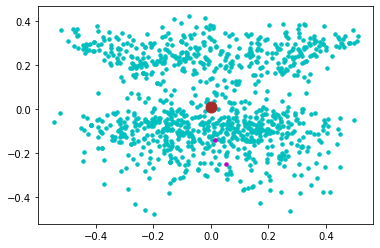

In [ ]:
def calculate_distance(x,y):
  dist = np.linalg.norm(x - y)
  return dist

def mean_distance(x,y):
  sum = 0;
  for i in y:
    sum += calculate_distance(x,i)
  return sum/len(y)

def max_distance(x,y):
  max = -1;
  for i in y:
    if calculate_distance(x,i) > max:
      max = calculate_distance(x,i)
  return max

def calculate_centroid(samples):
  centroid = [0 for i in samples[0]]
  for i in samples:
    for x in range(len(i)):
      centroid[x] += i[x]
  for i in range(len(centroid)):
    centroid[i] /= len(samples)
  return centroid

def calculate_coherence(samples,class_label):
  list1 = []
  list2 = []

  for i in range(len(samples)):
    if class_label[i] == 0:
      list1.append(samples[i])
    else:
      list2.append(samples[i])

  coherence = len(list1) / ( len(list1) + len(list2) )

  return coherence

mean_dist = mean_distance(calculate_centroid(data_normalized.values),data_normalized.values)

cluster_coherence = []
centroids = []
centroids.append(calculate_centroid(data_normalized.values))
cluster_coherence.append(1)

for index in range(len(data_normalized)):
  x = data_normalized.values[index][0]
  a = data_normalized.values[index][1]
  if class_label[index] == 0:
    plt.scatter(x, a, c='c', s=[12])
  if class_label[index] == 1:
    plt.scatter(x, a, c='m', s=[12])
for i in centroids:
  x = i[0]
  b = i[2]
  plt.scatter(x, b, c='brown', s=[120])
plt.show()

Training of model

##Novelty Part : Code Logic Phase 1(Learning Phase)

In [ ]:
import math

import time

start = time.time()

while True:
  prev_centriod_len = len(centroids)
  cluster_member = [[] for i in centroids]
  cluster_member_class = [[] for i in centroids]

  for i in range(len(data_normalized.values)):
    nearest_centroid = 0
    min_dist = 99999;
    for x in range(len(centroids)):
      if calculate_distance(data_normalized.values[i],centroids[x])<min_dist:
        min_dist = calculate_distance(data_normalized.values[i],centroids[x])
        nearest_centroid = x
    if min_dist > mean_dist:
      centroids.append(data_normalized.values[i])
      cluster_member.append([])
      cluster_coherence.append(1)
      cluster_member_class.append([])
    else:
      cluster_member[nearest_centroid].append(data_normalized.values[i])
      cluster_member_class[nearest_centroid].append(class_label[i])
      cluster_coherence[nearest_centroid] = calculate_coherence(cluster_member[nearest_centroid], cluster_member_class[nearest_centroid])

  centroids1 = []
  cluster_coherence1 = []
  for yy in range(len(centroids)):

    if cluster_coherence[yy] <= 0.8 and (1 - cluster_coherence[yy]) <= 0.8:
      new_cluster_one = []
      new_cluster_two = []
      new_cluster_one_class = []
      new_cluster_two_class = []

      for t in range(len(cluster_member[yy])):
        if cluster_member_class[yy][t] == 0:
          new_cluster_one.append(cluster_member[yy][t])
          new_cluster_one_class.append(0)
        else:
          new_cluster_two.append(cluster_member[yy][t])
          new_cluster_two_class.append(1)

      new_centroid_one = calculate_centroid(new_cluster_one)
      new_centroid_two =calculate_centroid(new_cluster_two)

      centroids1.append(new_centroid_one)
      centroids1.append(new_centroid_two)

      cluster_coherence1.append(1)
      cluster_coherence1.append(1)

    else:
      centroids1.append(centroids[yy])
      cluster_coherence1.append(cluster_coherence[yy])

  centroids = centroids1
  cluster_coherence = cluster_coherence1

  current_centroids_len = len(centroids)

#  for index in range(len(data_normalized)):
#    x = data_normalized.values[index][0]
#    a = data_normalized.values[index][2]
#    if class_label[index] == 0:
#      plt.scatter(x, a, c='c', s=[12])
#    if class_label[index] == 1:
#      plt.scatter(x, a, c='m', s=[12])
#  for i in centroids:
#    x = i[0]
#    b = i[2]
#    plt.scatter(x, b, c='brown', s=[120])
#  plt.show()

  if current_centroids_len == prev_centriod_len:
    break

print("Total time: ", time.time() - start, "seconds")

Total time:  3.3881752490997314 seconds


Resultant Representation after training

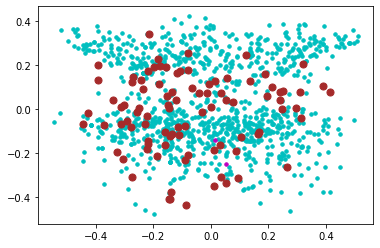

In [ ]:
for index in range(len(data_normalized)):
  x = data_normalized.values[index][0]
  a = data_normalized.values[index][1]
  if class_label[index] == 0:
    plt.scatter(x, a, c='c', s=[12])
  if class_label[index] == 1:
    plt.scatter(x, a, c='m', s=[12])
for i in range(len(cluster_member)):
  x = centroids[i][0]
  b = centroids[i][2]
  plt.scatter(x, b, c='brown', s=[50])
plt.show()

In [ ]:
print(len(centroids))

230


In [ ]:
print(len(data))

125940


In [ ]:
cluster_coherence[0]

0.93


In [ ]:
class_label[0]

0

Classification using Representatives

##Novelty Part : Code Logic Phase 2(Classification Phase)

In [ ]:
# Locate the most similar neighbors

def equilidean_dist(row1, row2):
  sum_dist =0
  for x in range(len(row1)):
    sum_dist += (row1[x] - row2[x]) ** 2

  return math.sqrt(sum_dist)

def get_neighbors(centroids, coherence, instance, num_neighbors):
  distances = list()
  for index in range(len(centroids)):
    dist = calculate_distance(centroids[index], instance)
    distances.append((centroids[index], coherence[index], dist))
  distances.sort(key=lambda tup: tup[2])
  neighbors = list()
  for i in range(1,num_neighbors+1):
    neighbors.append((distances[i][0], distances[i][1]))
  return neighbors

def predict_class(centroids, cluster_coherence, cluster_member, K, instance):
  neighbour_centroids = get_neighbors(centroids, cluster_coherence, instance,K)

  sum_of_distance = 0
  for i in neighbour_centroids:
    sum_of_distance += equilidean_dist(i[0],instance)

  sum_of_coherence = 0
  for i in neighbour_centroids:
    sum_of_coherence += i[1]
  if sum_of_coherence == 0:
    sum_of_coherence = 0.000001

  sum_of_cluster_members = 0
  for i in neighbour_centroids:
    for x in range(len(centroids)):
      if len(list(set(centroids[x]).intersection(set(i[0])))) == len(centroids[x]):
        sum_of_cluster_members += len(cluster_member[x])
        break
  if sum_of_cluster_members ==0:
    sum_of_cluster_members = 0.000001


  neighbours_score = []
  for i in neighbour_centroids:
    neighbours_score_temp = []
    neighbours_score_temp.append(i[0])
    neighbours_score_temp.append(i[1]/sum_of_coherence)
    neighbours_score_temp.append(1 - equilidean_dist(i[0],instance) / sum_of_distance+ 0.01)
    for x in range(len(centroids)):
      if len(list(set(centroids[x]).intersection(set(i[0])))) == len(centroids[x]):
        neighbours_score_temp.append(len(cluster_member[x]) / sum_of_cluster_members + 0.01)
        break
    neighbours_score.append(neighbours_score_temp)

  final_neighbour_score = []
  for i in neighbours_score:
    final_neighbour_score.append(i[1]+i[2]+i[3])

  normalized_final_neighbour_score = []
  for i in final_neighbour_score:
    normalized_final_neighbour_score.append(i/sum(final_neighbour_score)+0.01)

  predicted_class = 0

  for i in range(len(neighbour_centroids)):
    predicted_class += neighbour_centroids[i][1] * normalized_final_neighbour_score[i]

  return predicted_class



In [ ]:
class_label[5]

0

In [ ]:
def func(k):
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  wrong =0
  right = 0
  for i in range(len(test_data_normalized.values)):
    predicted_val = predict_class(centroids, cluster_coherence, cluster_member, k, data_normalized.values[i])
    if predicted_val <= 0.5:
      if class_label[i] == 1:
        TP +=1
        right +=1
      else:
        FN +=1
        wrong +=1
    else:
      if class_label[i] == 0:
        TN +=1
        right +=1
      else:
        FP +=1
        wrong +=1

  if TP == 0:
    TP = 0.00001
  precision = TP/(TP + FP)
  recall = TP/(TP + FN)
  F1_score = 2 * ((precision * recall) / (precision + recall))
  print(str(TP) + ':' + str(TN) + ':' + str(FP) + ':' + str(FN))
  return ((right/(right + wrong)),precision, recall, F1_score)


In [ ]:
accuracies = []
for i in range(1,len(centroids)):
  val = func(i)
  accuracies.append(val)
  print(val)

1e-05:992:2:6
(0.992, 4.9999750001249995e-06, 1.6666638888935187e-06, 2.499993750015625e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750001249995e-06, 1.0, 9.99990000099999e-06)
1e-05:998:2:0
(0.998, 4.9999750

KeyboardInterrupt: ignored

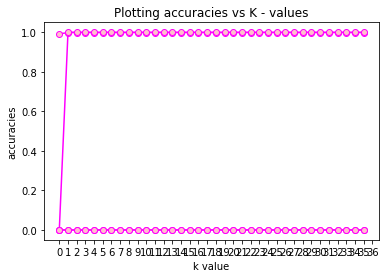

In [ ]:

import matplotlib.pyplot as plt
import random

plt.plot(accuracies, color='magenta', marker='o',mfc='pink' ) #plot the data
plt.xticks(range(0,len(accuracies)+1, 1)) #set the tick frequency on x-axis

plt.ylabel('accuracies') #set the label for y axis
plt.xlabel('k value') #set the label for x-axis
plt.title("Plotting accuracies vs K - values") #set the title of the graph
plt.show()

In [ ]:
accuracies

[(0.2178669097538742,
  0.18415841584158416,
  0.1725417439703154,
  0.1781609195402299),
 (0.3846855059252507,
  0.019801980198019802,
  0.05263157894736842,
  0.028776978417266185)]

KNN

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = pd.read_csv('/content/drive/MyDrive/SEM 8/Project/Compression and Acceleration of Deep Neural Network/Credit_Card_Applications.csv')

# Create feature and target arrays

y = data['Class']
del data['Class']
X = data

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=7)

In [ ]:
res = knn.predict(X_train)
right =0
wrong =0
for i in range(len(res)):
  if res[i] == y_train.values[i]:
    right +=1
  else:
    wrong +=1

print(right/(right+wrong))

0.6938405797101449


In [ ]:
# Example of getting neighbors for an instance
from math import sqrt
import random

class swogut:
  N=100
  K=5
  C=1
  M=100
  MinoritySample = []
  MajoritySample = []
  New_MinoritySample = []
  New_MajoritySample = []
  SyntheticSample = []
  RemovedMajoritySample = []
  T = 0
  centroids = []
  df_head = []

  def __init__(self,N,K,C,M,Minority_class,Majority_class,df_head):
    self.N=N
    self.K=min(K,len(Minority_class)-1)
    self.MinoritySample = Minority_class
    self.MajoritySample = Majority_class
    self.New_MajoritySample = Majority_class
    self.New_MinoritySample = [i for i in Minority_class]
    self.T=len(self.MinoritySample)
    self.df_head = df_head
    self.C=min(C,len(Minority_class)-1)
    self.M=min(M,len(Majority_class)-1)


  def getMajorityData(self):
    return self.New_MajoritySample

  def getMinorityData(self):
    return self.New_MinoritySample

  def Plot_Syntheticdata(self,X,Y,COL):
    df = pd.DataFrame(self.SyntheticSample,columns=self.df_head)
    df.plot(kind = 'scatter',x = X,y = Y,color=COL)

  def Plot_RemovedData(self,X,Y,COL):
    df = pd.DataFrame(self.RemovedMajoritySample,columns=self.df_head)
    df.plot(kind = 'scatter',x = X,y = Y,color=COL)

  def Plot_Centroids(self,X,Y,COL):
    df = pd.DataFrame(self.centroids,columns=self.df_head)
    df.plot(kind = 'scatter',x = X,y = Y,color=COL)

  def Plot_MajoritySample(self,X,Y,COL):
    df = pd.DataFrame(self.MajoritySample,columns=self.df_head)
    df.plot(kind = 'scatter',x = X,y = Y,color=COL)

  def Plot_MinoritySample(self,X,Y,COL):
    df = pd.DataFrame(self.MinoritySample,columns=self.df_head)
    df.plot(kind = 'scatter',x = X,y = Y,color=COL)

  def Plot_InitialDataset(self,X,Y,COL1,COL2):
    dx = pd.DataFrame(self.MajoritySample,columns=self.df_head)
    dy = pd.DataFrame(self.MinoritySample,columns=self.df_head)
    ax = dx.plot(kind = 'scatter', x = X,y = Y,color = COL1)
    dy.plot(kind = 'scatter', x = X,y = Y,color = COL2,ax=ax)

  def Plot_FinalDataset(self,X,Y,COL1,COL2):
    dx = pd.DataFrame(self.New_MajoritySample,columns=self.df_head)
    dy = pd.DataFrame(self.New_MinoritySample,columns=self.df_head)
    ax = dx.plot(kind = 'scatter', x = X,y = Y,color = COL1)
    dy.plot(kind = 'scatter', x = X,y = Y,color = COL2,ax=ax)

  def multiply_ratio(self,row1, ratio):
    row2 = [n*ratio for n in row1]
    return row2

  def add_weight(self,row1, weight,nn):

    res_list = []
    for i in range(0, len(row1)):
      if row1[i] - nn[i] >0:
        res_list.append(row1[i] - weight[i])
      else:
        res_list.append(row1[i] + weight[i])
    return res_list

  def euclidean_distance_row(self,row1, row2):
    row3 =[]
    for i in range(len(row1)):
      row3.append(abs(row1[i] - row2[i]))
    return row3
  # calculate the Euclidean distance between two vectors
  def euclidean_distance(self,row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
      distance += abs(row1[i] - row2[i])
    return distance

  # Locate the most similar neighbors
  def get_neighbors(self,train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
      dist = self.euclidean_distance(test_row, train_row)
      distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(1,num_neighbors+1):
      neighbors.append(distances[i][0])
    return neighbors

  def get_neighbors1(self,train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
      dist = self.euclidean_distance(test_row, train_row)
      distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
      neighbors.append(distances[i][0])
    return neighbors



    # Locate the most similar neighbors
  def get_neighbors_distance(self,train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
      dist = self.euclidean_distance(test_row, train_row)
      distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    distance =0.0
    for i in range(1,num_neighbors+1):
      distance += distances[i][1]
    return distance

  def sample(self):


    centroid = [0 for n in self.MinoritySample[0]]
    for i in range(len(self.MinoritySample)):
      for x in range(len(self.MinoritySample[0])):
        centroid[x] +=self.MinoritySample[i][x]

    for x in range(len(centroid)):
        centroid[x] = centroid[x]/len(self.MinoritySample)

    if self.N<100:
      self.T=int((self.N/100)*self.T)
      self.N=100

    self.N=int(self.N/100)


    for i in range(0,self.T):
      times = self.N
      x = self.get_neighbors(self.MinoritySample, self.MinoritySample[i], self.K)

      while(times>0):
        ran = random.randint(0,min(len(x)-1,(self.K-1)))
        nn = [n for n in x[ran]]

        sdis = self.euclidean_distance_row(self.MinoritySample[i],nn)

        di= self.get_neighbors_distance(self.MinoritySample, self.MinoritySample[i], self.K)
        dnn = self.get_neighbors_distance(self.MinoritySample, nn, self.K)
        mdis1 = 0
        mdis2 = 0

        for i1 in range(len(centroid)):
          mdis1 += abs(centroid[i1] - self.MinoritySample[i][i1])

        for i1 in range(len(centroid)):
          mdis2 += abs(centroid[i1] - nn[i1])


        ratio =0
        try:
          ratio = di+mdis1/ (di + dnn + mdis1 + mdis2)
        except:
          ratio = 0




        sdis = self.multiply_ratio(sdis,ratio)
        sdata = self.add_weight(self.MinoritySample[i],sdis,nn)
        self.SyntheticSample.append(sdata)
        self.New_MinoritySample.append(sdata)
        times=times-1

    self.centroids = []



    self.centroids.append(centroid);
    l = len(self.MinoritySample)-1
    while  self.C>1:
      self.C = self.C-1
      centroids_temp = self.get_neighbors1(self.MinoritySample, centroid,len(self.MinoritySample))
      self.centroids.append(centroids_temp[l])
      l=l-1
      centroid = centroids_temp[l]




    for i in range(len(self.centroids)):
      list_remove = self.get_neighbors1(self.MajoritySample, self.centroids[i],min(len(self.MinoritySample),self.M))
      for t in list_remove:
        self.RemovedMajoritySample.append(t)
        for ind in range(len(self.New_MajoritySample)):
          if len(list(set(self.New_MajoritySample[ind]).intersection(set(t)))) == len(self.New_MajoritySample[ind]):
            del self.New_MajoritySample[ind]
          break



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SEM 8/Project/CWRU DATASET/CWRU DATASET - Sheet1 - CWRU DATASET - Sheet1(1).csv')

Majority_class = []
Minority_class = []

for i in range(len(data)):
  if data['Fault'][i] == 1:
    Minority_class.append(data.values[i])
  else:
    Majority_class.append(data.values[i])

In [ ]:
Minority_class = Minority_class[:300]

In [ ]:
print("Before Sampling")
print("Majority Class : " + str(len(Majority_class)))
print("Minority Class : " + str(len(Minority_class)))

sw = swogut(200,10,300,60,Minority_class,Majority_class,list(data))
sw.sample()
print("After Sampling")

print("Majority Class : " + str(len(sw.getMajorityData())))
print("Minority Class : " + str(len(sw.getMinorityData())))
Majority_class = sw.getMajorityData()
Minority_class = sw.getMinorityData()

Before Sampling
Majority Class : 592
Minority Class : 300
After Sampling
Majority Class : 592
Minority Class : 900


In [ ]:
print("Majority Class : " + str(len(sw.getMajorityData())))
print("Minority Class : " + str(len(sw.getMinorityData())))
Majority_class = sw.getMajorityData()
Minority_class = sw.getMinorityData()

Majority Class : 592
Minority Class : 900


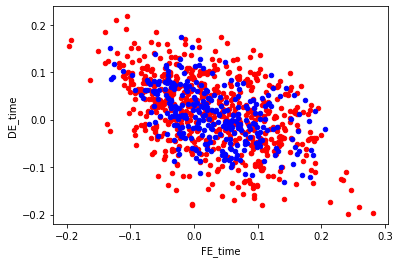

In [ ]:
sw.Plot_InitialDataset(0,1,'r','b')

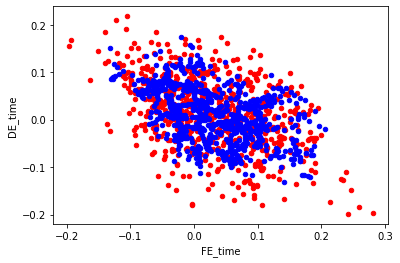

In [ ]:
sw.Plot_FinalDataset(0,1,'r','b')

In [ ]:
sw.New_MajoritySample

[array([1.45667273e-01, 5.31969231e-02, 1.79600000e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([9.77963636e-02, 8.86615385e-02, 1.79600000e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([5.48563636e-02, 9.97181539e-02, 1.79600000e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([3.69818182e-02, 5.86209231e-02, 1.79600000e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([ 5.44454546e-02, -4.58953846e-03,  1.79600000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 array([ 2.11618182e-02, -5.69520000e-02,  1.79600000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 array([-3.69818182e-03, -7.17636923e-02,  1.79600000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 array([-1.06836364e-02, -5.86209231e-02,  1.79600000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00]),
 array([ 2.93800000e-02, -4.65212308e-02,  1.79600000e+03,  0.00